# Retail Supermarket Analysis
## dataset contents : 
    - 13 columns : shipmode, segment, country, city, state, postal code, region, category, sub-category, sales, quantity, discount, profit
    - dataset : 9,994 samples
    - all of the data is US based
    
    - Shipping breakdown  
                          Standard Class: 59.72%
                          Second Class:   19.46%
                          First Class:    15.39%
                          Same Day:       5.4%
    - Consumer Breakdown 
                          Consumer       51.94%
                          Corporate      30.22%
                          Home Office    17.84%

    - Percent of Profit (Segmented)
                         Consumer        46.83%
                         Corporate       32.12%
                         Home office     21.05%

                           
## Goals for analysis : 
    - Where are most of the sales located (city/state)?
        - Top 10 States by Quantity Sold
            California, New York, Texas, Pennsylvania, Washington, Illinois, Ohio, Florida, Michigan, North Carolina
        - Top 10 States by Total Sales
          California -   457687.63
          New York -     310876.27
          Texas -        170188.05
          Washington -   138641.27
          Pennsylvania - 116511.91
          Florida -      89473.71
          Illinois -     80166.10
          Ohio -         78258.14
          Michigan -     76269.61
          Virginia -     70636.72
    - what category creates the most profit? which subcategory?
        - Tech (highest) and Office supplies are close, furniture is not very profitable overall
        - Copiers, Phones, Accessories, Paper are the highest grossing sub-categories
    - determine which location is the most profitable? 
        - Vermont, Rhode Island, Indiana, Montana, and Minnesota are the 5 highest in terms of avg profitability
    - Do the discounts have any affect on total profit?
        - 48% of the items were sold at regular price (0% discount) Table Below shows what percent were discounted
        - most profitable was 0% which makes sense, least profitable was 70% discount, 
          interesting because there were other items that were discounted higher and lost less profit
        Discount     Percent of Whole  Profit
        0.00              48.0        $320,987.60
        0.70              4.0         $-40,075.36

In [38]:
#using pandas for data manipulation and seaborn/matplotlib for visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
retail_df = pd.read_csv("SampleSuperstore.csv")
retail_df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [145]:
retail_pct_profit = retail_df.groupby('Segment')['Profit'].sum().reset_index()
retail_pct_profit['pct_of_whole'] = retail_pct_profit['Profit'] / sum(retail_pct_profit['Profit']) * 100
retail_pct_profit['pct_of_whole'] = retail_pct_profit['pct_of_whole'].round(2)

retail_pct_profit

,Segment,Profit,pct_of_whole
0,Consumer,134119.2092,46.83
1,Corporate,91979.1340,32.12
2,Home Office,60298.6785,21.05


In [148]:
high_sales = retail_df.groupby('State')['Sales'].sum().reset_index()
high_sales = high_sales.sort_values(by = 'Sales', ascending=False)[:10]
high_sales

,State,Sales
3,California,457687.6315
30,New York,310876.2710
41,Texas,170188.0458
45,Washington,138641.2700
36,Pennsylvania,116511.9140
8,Florida,89473.7080
11,Illinois,80166.1010
33,Ohio,78258.1360
20,Michigan,76269.6140
44,Virginia,70636.7200


In [144]:
quantity_sold = retail_df.groupby('State')['Quantity'].count().reset_index()
quantity_sold = quantity_sold.sort_values(by='Quantity', ascending=False).reset_index()[:10]
quantity_sold

,index,State,Quantity
0,3,California,2001
1,30,New York,1128
2,41,Texas,985
3,36,Pennsylvania,587
4,45,Washington,506
5,11,Illinois,492
6,33,Ohio,469
7,8,Florida,383
8,20,Michigan,255
9,31,North Carolina,249


### Concentration of sales by State 

In [8]:
# highest density of sales occurs in California, New York, and Texas -> 20%, 11.2%, 9.9% respectively
sales_concentration_state = retail_df['State'].value_counts(normalize = True)[:20]
sales_concentration_state

California        0.200220
New York          0.112868
Texas             0.098559
Pennsylvania      0.058735
Washington        0.050630
Illinois          0.049230
Ohio              0.046928
Florida           0.038323
Michigan          0.025515
North Carolina    0.024915
Arizona           0.022413
Virginia          0.022413
Georgia           0.018411
Tennessee         0.018311
Colorado          0.018211
Indiana           0.014909
Kentucky          0.013908
Massachusetts     0.013508
New Jersey        0.013008
Oregon            0.012407
Name: State, dtype: float64

### Concentration of sales by City

In [11]:
# slight discrepancy here from statewide density, Philidelphia is third highest concentration
sales_concentration_city = retail_df['City'].value_counts(normalize = True)[:20]
sales_concentration_city

New York City    0.091555
Los Angeles      0.074745
Philadelphia     0.053732
San Francisco    0.051031
Seattle          0.042826
Houston          0.037723
Chicago          0.031419
Columbus         0.022213
San Diego        0.017010
Springfield      0.016310
Dallas           0.015709
Jacksonville     0.012508
Detroit          0.011507
Newark           0.009506
Richmond         0.009005
Jackson          0.008205
Columbia         0.008105
Aurora           0.006804
Phoenix          0.006304
Long Beach       0.006104
Name: City, dtype: float64

In [30]:
# based on the following, we can tell the profit and sales for technology far exceeds Furniture, 
# however, the profit for office supplies is relatively close to technology even though it has far less tota sales

largest_sale_category = retail_df.groupby('Category')[['Sales','Profit']].sum().reset_index()
largest_sale_category = largest_sale_category.sort_values(by = ['Sales'], ascending= False, ignore_index=True).round(2)
largest_sale_category

,Category,Sales,Profit
0,Technology,836154.03,145454.95
1,Furniture,741999.80,18451.27
2,Office Supplies,719047.03,122490.80


In [32]:
# let's use the same logic to inspect the subcategories

largest_sale_subcategory = retail_df.groupby('Sub-Category')[['Sales','Profit']].sum().reset_index()
largest_sale_subcategory = largest_sale_subcategory.sort_values(by = ['Sales'], ascending= False, ignore_index=True).round(2)[:10]
largest_sale_subcategory

,Sub-Category,Sales,Profit
0,Phones,330007.05,44515.73
1,Chairs,328449.10,26590.17
2,Storage,223843.61,21278.83
3,Tables,206965.53,-17725.48
4,Binders,203412.73,30221.76
5,Machines,189238.63,3384.76
6,Accessories,167380.32,41936.64
7,Copiers,149528.03,55617.82
8,Bookcases,114880.00,-3472.56
9,Appliances,107532.16,18138.01


In [34]:
# subcategories are a little harder to visualize in the dataframe, so let's group by profit instead of sales 
# and then plot our results to get a better visual representation

largest_profit_subcategory = retail_df.groupby('Sub-Category')[['Sales','Profit']].sum().reset_index()
largest_profit_subcategory = largest_profit_subcategory.sort_values(by = ['Profit'], ascending= False, ignore_index=True).round(2)[:10]
largest_profit_subcategory

,Sub-Category,Sales,Profit
0,Copiers,149528.03,55617.82
1,Phones,330007.05,44515.73
2,Accessories,167380.32,41936.64
3,Paper,78479.21,34053.57
4,Binders,203412.73,30221.76
5,Chairs,328449.10,26590.17
6,Storage,223843.61,21278.83
7,Appliances,107532.16,18138.01
8,Furnishings,91705.16,13059.14
9,Envelopes,16476.40,6964.18


### Plotting the sub categories

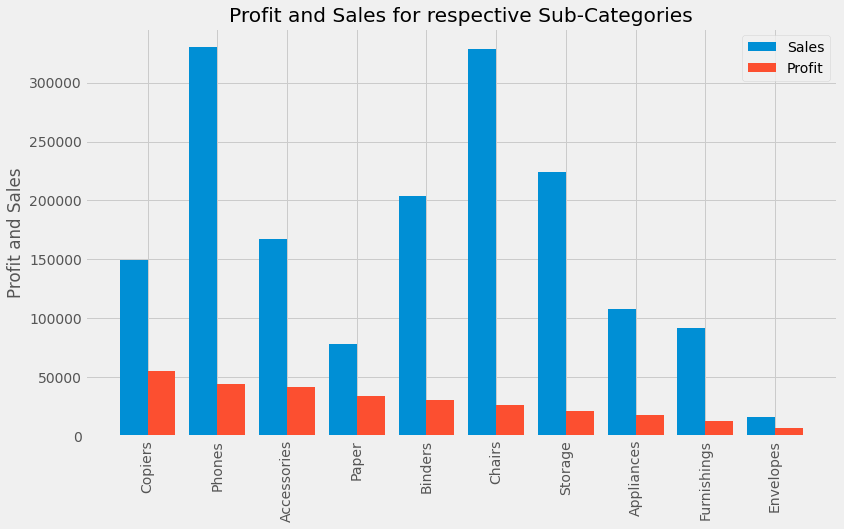

In [132]:
# Using a barplot to visualize the sales vs profit
plt.style.use('fivethirtyeight')
sub_cats = largest_profit_subcategory['Sub-Category']
plt_sub_cats = list(sub_cats)

sales = list(largest_profit_subcategory['Sales'])
profit = list(largest_profit_subcategory['Profit'])



x = np.arange(10)
width = 0.4
multiplier = 0
fig = plt.gcf()
fig.set_size_inches(12,7)

plt.bar(x - 0.2, sales, width)
plt.bar(x+0.2, profit, width)



#Adding text to the visual
plt.ylabel('Profit and Sales')
plt.title('Profit and Sales for respective Sub-Categories')
plt.xticks(x, plt_sub_cats, rotation = 90)
plt.legend(['Sales', 'Profit'], loc = 'upper right')

plt.show()


### Which location has the highest profitability? 

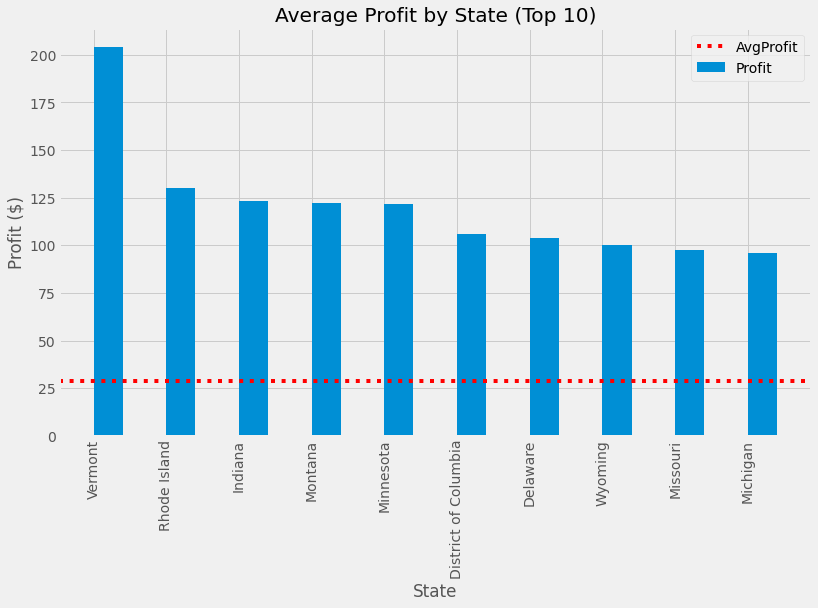

In [135]:
state_profit = retail_df.groupby('State')['Profit'].mean().sort_values(ascending=False).reset_index()[:10]
state_profit = state_profit.round(1)

average_profit_all = retail_df['Profit'].mean()



sub_cats = state_profit['State']
plt_sub_cats = list(sub_cats)

profit = list(state_profit['Profit'])



x = np.arange(10)
width = 0.4
multiplier = 0
fig = plt.gcf()
fig.set_size_inches(12,7)

plt.bar(x+0.2, profit, width)
plt.axhline(average_profit_all, color = 'red', ls = 'dotted')



#Adding text to the visual
plt.ylabel('Profit ($)')
plt.xlabel('State')
plt.title('Average Profit by State (Top 10)')
plt.xticks(x, plt_sub_cats, rotation = 90)
plt.legend(['AvgProfit','Profit'], loc = 'upper right')

plt.show()


### Percentage Distribution of Discounts

In [158]:
retail_df['Discount'].value_counts(normalize=True).round(2) * 100

0.00    48.0
0.20    37.0
0.70     4.0
0.80     3.0
0.30     2.0
0.40     2.0
0.60     1.0
0.10     1.0
0.50     1.0
0.15     1.0
0.32     0.0
0.45     0.0
Name: Discount, dtype: float64

### Profit associated with each discount (High -> Low)

In [152]:
discount_profit = retail_df.groupby('Discount')['Profit'].sum().reset_index()
discount_profit = discount_profit.sort_values(by='Profit', ascending=False)
discount_profit

,Discount,Profit
0,0.00,320987.6032
3,0.20,90337.3060
1,0.10,9029.1770
2,0.15,1418.9915
5,0.32,-2391.1377
7,0.45,-2493.1111
9,0.60,-5944.6552
4,0.30,-10369.2774
8,0.50,-20506.4281
6,0.40,-23057.0504
